# A simple wordcloud with using telegram chat with my girlfriend to see the more frequent words we use, with a personalized background too

In [ ]:
# import
import os
import bs4
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# directory of file html, different html contains chunks of my chat
html_dir = "ChatExport_2024-03-16"

# final chat file, txt format
output_file = "chat.txt"

# Opening file in write mode and "utf-8" encoding
with open(output_file, "w", encoding="utf-8") as out_file:

    # For every file in the directory
    for filename in os.listdir(html_dir):
        # HTML check
        if filename.endswith(".html"):
            # open file
            with open(os.path.join(html_dir, filename), "r", encoding="utf-8") as html_file:
                # Analyzing content with BeautifulSoup
                soup = bs4.BeautifulSoup(html_file, "html.parser")
                # Extracting text
                text = soup.get_text()
                # Write in output file
                out_file.write(text + "\\n\\n")


print(f"Tutti i file HTML in {html_dir} sono stati convertiti con successo in testo e salvati in {output_file}.")


Tutti i file HTML in ChatExport_2024-03-16 sono stati convertiti con successo in testo e salvati in chat.txt.


In [ ]:
# Background image
mask_image = Image.open("heart.png")

# Image in 4K (3840x2160)
mask_image_resized = mask_image.resize((3840, 2160))

# Save image in 4k
mask_image_resized.save("heart4k.png")

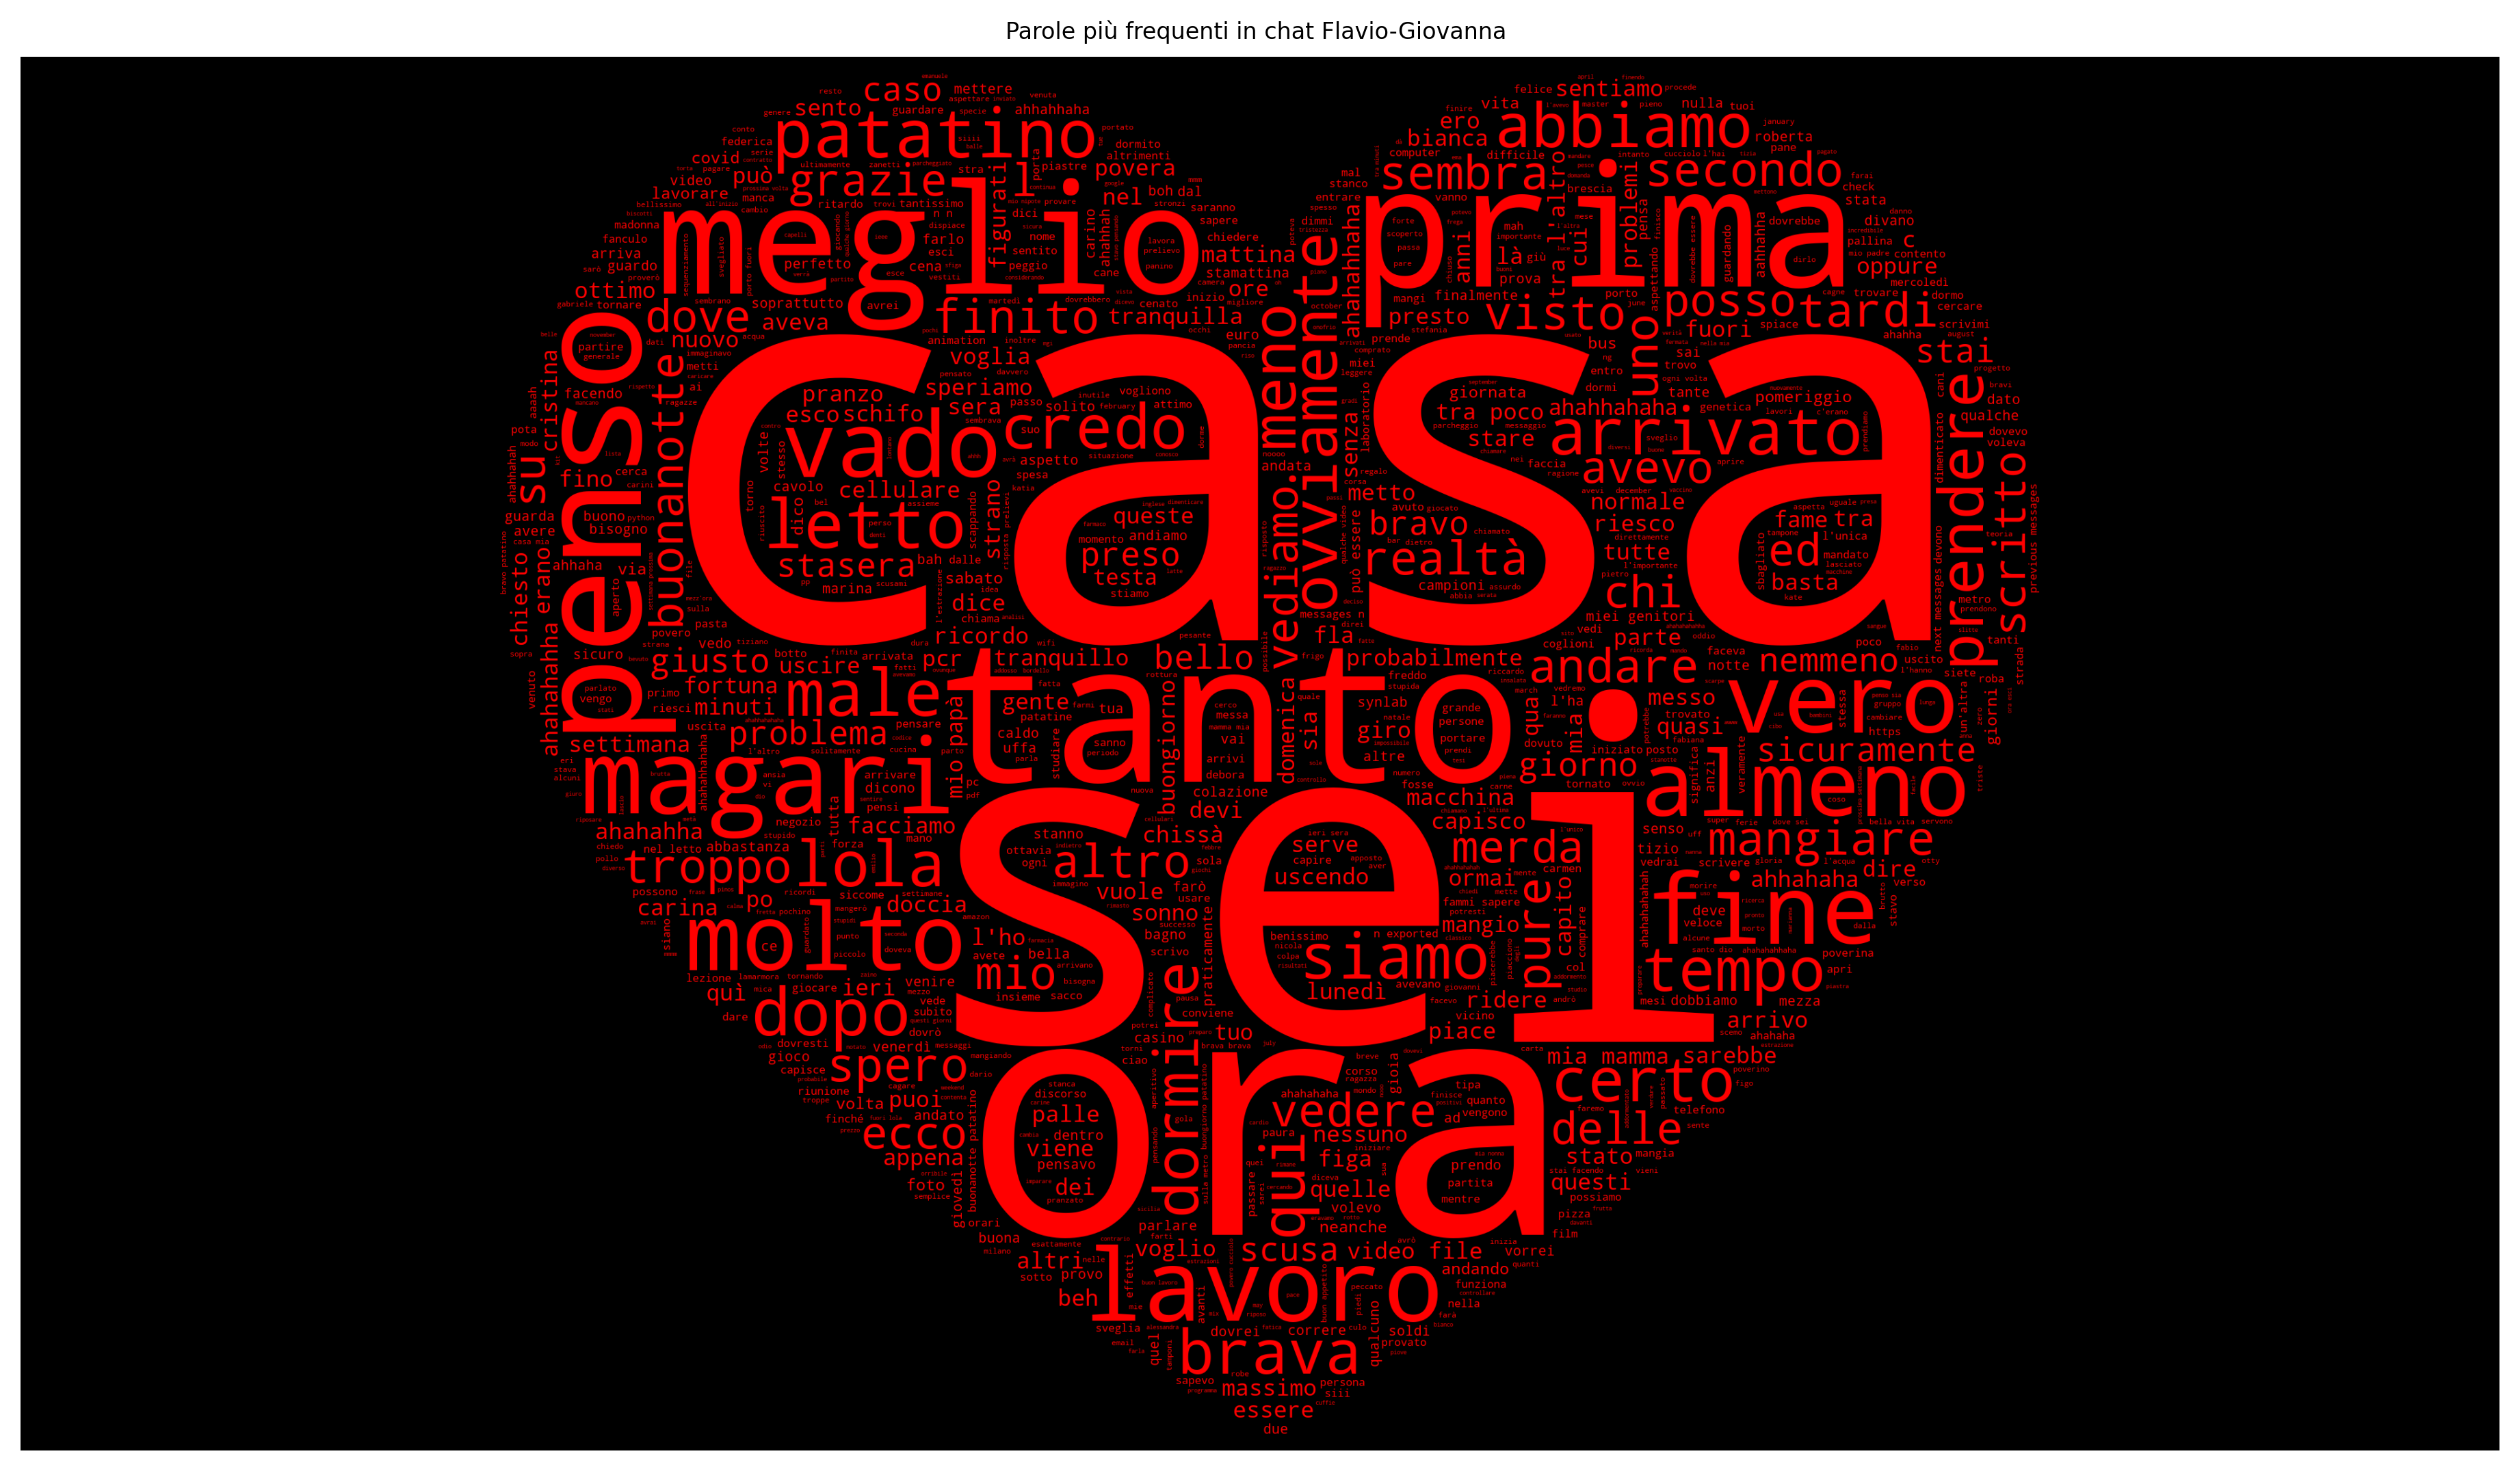

In [ ]:
# All the words has to be red
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "#ff0000"  # Red

# File directory
d = os.getcwd()

# Read file
text = open(os.path.join(d, 'chat.txt'), encoding="utf-8").read().lower()

# Adding some italian stopwords and some other common words
stopwords = set(STOPWORDS)
stopwords.update([
    "di", "in", "che", "e", "la", "il", "un", "a", "per", "non", "una", "le", "mi", "ho", "ha", "si", "lo", "ma", "ti", "sul", "con", "del", "al", "da", "gli", "come", "più", "questo", "quando", "anche", "se", "tutto", "tutti", "io", "tu", "lui", "lei", "noi", "voi", "loro", "me", "te", "ci", "ne", "li", "Flavio", "Flavio Orizio", "Giovanna", "Giovanna Ruggeri", "change", "data", "exporting","data exporting","voice message","voice","Ruggeri voice", "FO","GR", "message","settings","reply", "download","included","orizio","kb","ruggeri","sticker","photo","perché", "comunque","però","po'","poi","quindi","sono","sì","così","adesso","è","ok","c'è","c'era","va bene","eh","fare","oggi","domani","ah","allora","cioè","già","sempre","era",".", "vabbè","alle","va bene","mb","ahhahhah","ahahhaha","ahhahha","o","ahhahah","va bè","sta","hanno","ahahah","bo","va bene","solo","forse","mai","infatti","quello","va","bene","fatto","cazzo","ahahahah","detto","dai","tipo","hai","cosa","niente","ancora","fa","fai","lì","cose","proprio","vuoi","faccio","alla","bè","esatto","be'","qualcosa","mangiato","questa","devo","sa","della","quella","fanno",".","quelli","invece","sarà","sto","ahahahahah"
    ])

# Mask image
mask = np.array(Image.open(os.path.join(d, "heart4k.png")))

# Creating wordcloud
wc = WordCloud(max_words=1000, stopwords=stopwords, margin=10, mask = mask, random_state=1, width=1920, height=1080).generate(text)

# Red words
wc = wc.recolor(color_func=red_color_func, random_state=3)

# Saving image
wc.to_file("WordCloud chat.png")

# Visualizing wordcloud
plt.figure(figsize=(16,9), dpi=300)
plt.imshow(wc, interpolation="bilinear")

# Adding image title
plt.title("Parole più frequenti in chat Flavio-Giovanna", fontsize=8)

plt.axis("off")

# show img
plt.show()


# In conclusion, we really like staying home 🏠